In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from glob import glob
import random
import cv2
import json

from webbox.generate_links import generate_wiki_links
from webbox.webbox import WebBoxGenerator

/home/nazarii/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# GENERATE LINKS

In [2]:
links = generate_wiki_links(100, 'Интернет')

# GENERATE DATASET

In [3]:
wbx = WebBoxGenerator(path='../', links=links)
try:
    wbx.generate_dataset()
finally:
    del wbx

Screenshots in ../dataset/screenshots
Annotations in ../dataset/annotations


# RESULT

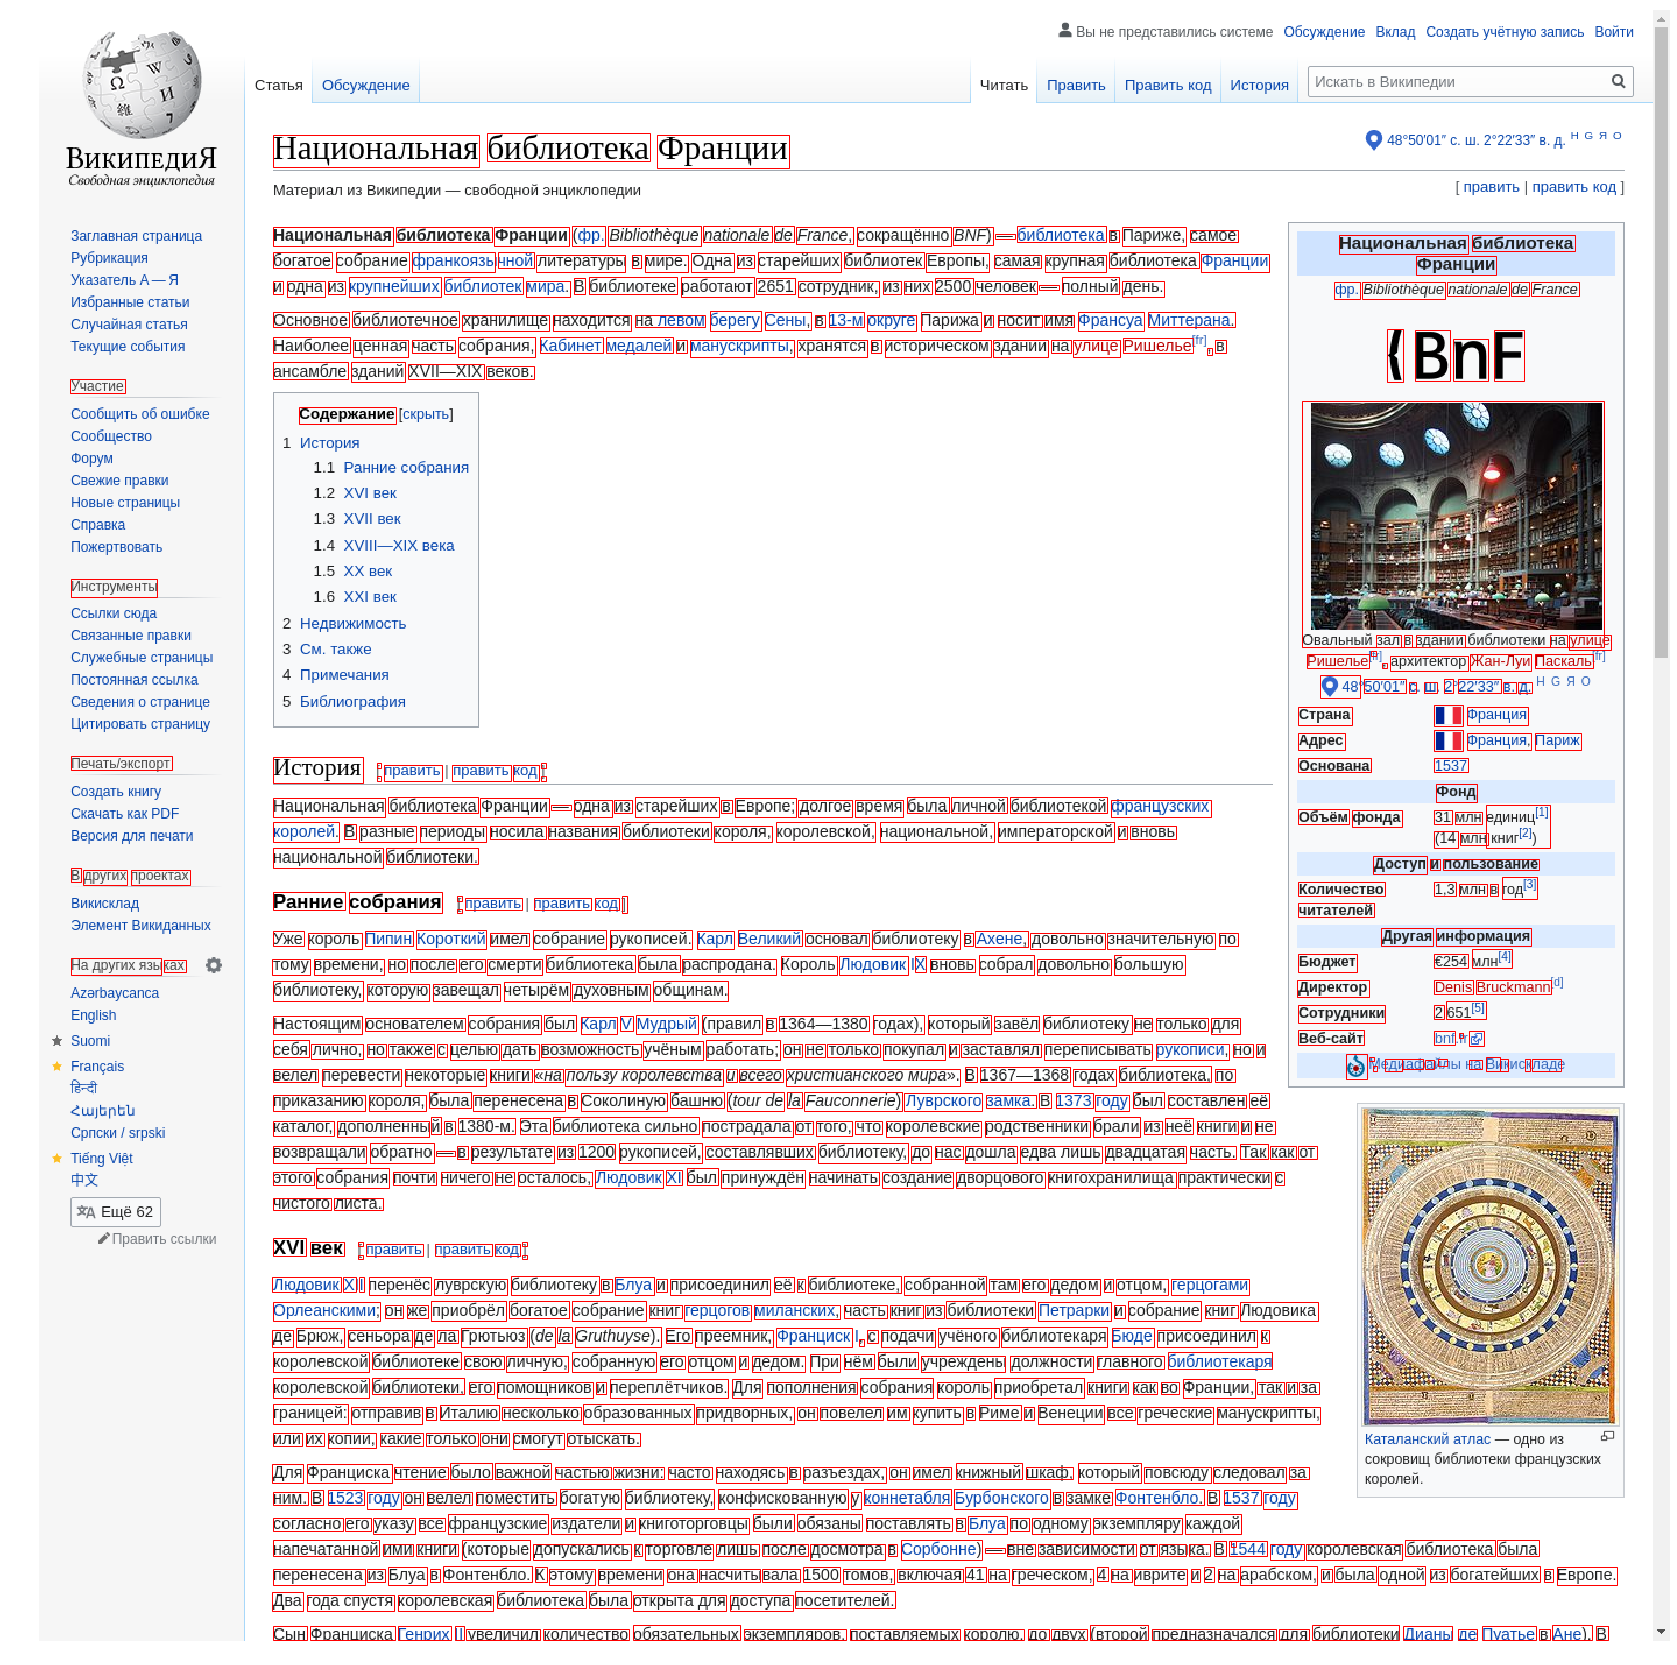

In [7]:
images = [img.split('/')[-1] for img in glob('../dataset/screenshots/*.png')]
title = random.choice(images).split('.')[0]

orig_img = cv2.cvtColor(cv2.imread('../dataset/screenshots/'+title+'.png'), cv2.COLOR_BGR2RGB)
bboxes = json.load(open('../dataset/annotations/'+title+'.json', 'r')).values()

fig, ax = plt.subplots(1, figsize=(60,30))
ax.imshow(orig_img)

for pol in bboxes:
    pol = np.asarray(pol)
    rec = Rectangle(pol[[0,1]], *(pol[[2,3]] - pol[[0,1]]), 
                    linewidth=1, 
                    edgecolor='r', 
                    facecolor='none')
    ax.add_patch(rec,)
    
plt.axis('off')
plt.show()